# New Output 

## For NB+TF-IDF simulation on 24 out of 26 synergy datasets

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from asreview import open_state
from asreviewcontrib.insights.utils import pad_simulation_labels

### Access all state files from folder structure

In [6]:
# Path to the main folder
#folder_path = "C:/Users/Lsped/Documents/Academics/MASTER/Thesis/Simulations/Simulation_SYNERGY/output/simulation"
folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

# Iterate over subfolders
labels_dict= {}
state_files=[]
for root, dirs, files in os.walk(folder_path):
    for subdir in dirs:   
        subfolder_path = os.path.join(root, subdir)
        asreview_files = [f for f in os.listdir(subfolder_path) if f.endswith('.asreview')]
      
        # Iterate over asreview files in the subfolder
        for asreview_file in asreview_files: 
            state_files.append(asreview_file)
            asreview_file_path = os.path.join(subfolder_path, asreview_file)
            if asreview_file_path.endswith('.asreview'):            
                # Open the asreview file
                with open_state(asreview_file_path) as s:
                    labels= pad_simulation_labels(s, priors=False)
                    labels_dict[asreview_file] = labels


In [8]:
#format key string
labels_dict_p = {}

prefix_to_remove = "sim_"
suffix_to_remove = "_0.asreview"

for key, value in labels_dict.items():
    if key.startswith(prefix_to_remove):
        key = key[len(prefix_to_remove):]
    if key.endswith(suffix_to_remove):
        key = key[:-len(suffix_to_remove)]
    labels_dict_p[key] = value

  
    
#names of files, length of records  
for k,v in labels_dict_p.items():
    print(k, len(v))  
len(labels_dict_p)

Appenzeller-Herzog_2019 2871
Bos_2018 4876
Chou_2003 1906
Chou_2004 1628
Donners_2021 256
Hall_2012 8791
Jeyaraman_2020 1173
Leenaars_2019 5810
Leenaars_2020 7214
Meijboom_2021 880
Menon_2022 973
Moran_2021 5212
Muthu_2021 2717
Nelson_2002 364
Oud_2018 950
Radjenovic_2013 5933
Sep_2021 269
Smid_2020 2625
van_der_Valk_2021 723
van_der_Waal_2022 1968
van_de_Schoot_2018 4542
van_Dis_2020 9126
Wassenaar_2017 7666
Wolters_2018 4278


24

In [9]:
#convert all values to integers
labels_dict_i = {}
for key, value_list in labels_dict_p.items():
    try:
        labels_dict_i[key] = [int(value) for value in value_list]
    except ValueError:
        labels_dict_i[key] = value_list

## Confusion matrix functions

In [10]:
def _tp_values(labels, x_screened=False, x_absolute=False):      
    n_pos_docs = sum(labels)
    tp = np.cumsum(labels, dtype=int) 

    if x_screened:    
        return tp.tolist()

    if not x_screened: 
        x = np.arange(1, n_pos_docs + 1)
        
        if not x_absolute:
            x = x / n_pos_docs

        when_found = np.searchsorted(tp, np.arange(1, n_pos_docs + 1))
        y = tp[when_found]  

    return x.tolist(), y.tolist()

In [11]:
_tp_values(labels_dict_i['Donners_2021'])

([0.07142857142857142,
  0.14285714285714285,
  0.21428571428571427,
  0.2857142857142857,
  0.35714285714285715,
  0.42857142857142855,
  0.5,
  0.5714285714285714,
  0.6428571428571429,
  0.7142857142857143,
  0.7857142857142857,
  0.8571428571428571,
  0.9285714285714286,
  1.0],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [12]:
_tp_values(labels_dict_i['Donners_2021'], x_screened=True)

[1,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 5,
 6,
 6,
 6,
 6,
 7,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,

In [13]:
def _fp_values(labels, x_screened=False, x_absolute=False):
    
    n_pos_docs = sum(labels)
    n_docs = len(labels)
    tp = np.cumsum(labels, dtype=int)
    x = np.arange(1, n_docs + 1)
    fp = x - tp

    if x_screened:  
        return fp.tolist()
  
    if not x_screened:
    
        x = np.arange(1, n_pos_docs + 1)
        
        if not x_absolute:
            x = x / n_pos_docs

        when_found = np.searchsorted(tp, np.arange(1, n_pos_docs + 1))
        y = fp[when_found]
   
    return x.tolist(), y.tolist()

In [14]:
_fp_values(labels_dict_i['Donners_2021'])

([0.07142857142857142,
  0.14285714285714285,
  0.21428571428571427,
  0.2857142857142857,
  0.35714285714285715,
  0.42857142857142855,
  0.5,
  0.5714285714285714,
  0.6428571428571429,
  0.7142857142857143,
  0.7857142857142857,
  0.8571428571428571,
  0.9285714285714286,
  1.0],
 [0, 1, 2, 8, 8, 8, 11, 11, 14, 20, 20, 36, 40, 165])

In [15]:
def _tn_values(labels, x_screened=False, x_absolute=False):    
    n_pos_docs = sum(labels)
    n_docs = len(labels)
    tp = np.cumsum(labels, dtype=int)
    x = np.arange(1, n_docs + 1)
    n_excludes = labels.count(0)
    fp = x - tp
    tn = n_excludes - fp

    if x_screened:
        return tn.tolist()

    if not x_screened:
        x = np.arange(1, n_pos_docs + 1)
        
        if not x_absolute:
            x = x / n_pos_docs

        when_found = np.searchsorted(tp, np.arange(1, n_pos_docs + 1))
        y = tn[when_found]    

    return x.tolist(), y.tolist()

In [16]:
_tn_values(labels_dict_i['Donners_2021'])

([0.07142857142857142,
  0.14285714285714285,
  0.21428571428571427,
  0.2857142857142857,
  0.35714285714285715,
  0.42857142857142855,
  0.5,
  0.5714285714285714,
  0.6428571428571429,
  0.7142857142857143,
  0.7857142857142857,
  0.8571428571428571,
  0.9285714285714286,
  1.0],
 [242, 241, 240, 234, 234, 234, 231, 231, 228, 222, 222, 206, 202, 77])

In [17]:
def _fn_values(labels, x_screened=False, x_absolute=False):
    n_pos_docs = sum(labels)
    n_includes = int(sum(labels))
    tp = np.cumsum(labels, dtype=int)
    fn = n_includes-tp

    if x_screened:
        return fn.tolist()
    
    if not x_screened:
        x = np.arange(1, n_pos_docs + 1)

        if not x_absolute:
            x = x / n_pos_docs

        when_found = np.searchsorted(tp, np.arange(1, n_pos_docs + 1))
        y = fn[when_found]

    return x.tolist(), y.tolist()

In [18]:
_fn_values(labels_dict_i['Donners_2021'])

([0.07142857142857142,
  0.14285714285714285,
  0.21428571428571427,
  0.2857142857142857,
  0.35714285714285715,
  0.42857142857142855,
  0.5,
  0.5714285714285714,
  0.6428571428571429,
  0.7142857142857143,
  0.7857142857142857,
  0.8571428571428571,
  0.9285714285714286,
  1.0],
 [13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

# Metrics Output (at many recall intercepts)

In [69]:
synergy_metrics= pd.read_csv('SYN.csv') #from data_metrics.csv file after a simulation
synergy_metrics #click to expand window

,Unnamed: 0,file_name,recall_0.1,recall_0.25,recall_0.5,recall_0.75,recall_0.9,wss_0.95,erf_0.1,atd,...,fn_1,tnr_0.1,tnr_0.25,tnr_0.5,tnr_0.75,tnr_0.8,tnr_0.85,tnr_0.9,tnr_0.95,tnr_1
0,13,Appenzeller-Herzog_2019_0.json,0.880000,0.960000,0.960000,1.000000,1.000000,0.794845,0.800000,169.960000,...,0,0.997189,0.991216,0.981026,0.962052,0.929023,0.925861,0.921293,0.901616,0.429726
1,14,Bos_2018_0.json,1.000000,1.000000,1.000000,1.000000,1.000000,0.815217,0.888889,65.777778,...,0,0.000000,0.995274,0.993014,0.985206,0.984179,0.984179,0.983357,0.983357,0.963427
2,15,Chou_2003_0.json,0.857143,0.857143,0.928571,0.928571,1.000000,0.449108,0.785714,207.642857,...,0,0.998943,0.998943,0.983615,0.970402,0.930761,0.930761,0.930761,0.559725,0.223573
3,0,Chou_2004_0.json,0.250000,0.375000,0.625000,1.000000,1.000000,0.208845,0.125000,572.625000,...,0,0.000000,0.983333,0.582099,0.448148,0.448148,0.448148,0.397531,0.397531,0.396914
4,1,Donners_2021_0.json,0.642857,0.928571,0.928571,1.000000,1.000000,0.687500,0.571429,32.071429,...,0,1.000000,0.991736,0.954545,0.917355,0.917355,0.917355,0.851240,0.834711,0.318182
5,16,Hall_2012_0.json,0.990291,1.000000,1.000000,1.000000,1.000000,0.910818,0.893204,122.563107,...,0,0.999424,0.998273,0.994705,0.990677,0.990447,0.989641,0.988605,0.984692,0.806054
6,2,Jeyaraman_2020_0.json,0.568421,0.778947,0.989474,0.989474,0.989474,0.543052,0.473684,166.673684,...,0,0.997217,0.988868,0.956401,0.833952,0.785714,0.769944,0.661410,0.648423,0.068646
7,12,Leenaars_2019_0.json,1.000000,1.000000,1.000000,1.000000,1.000000,0.894664,0.875000,31.875000,...,0,1.000000,0.999310,0.999137,0.995340,0.995340,0.995340,0.993096,0.990853,0.975664
8,17,Leenaars_2020_0.json,0.475945,0.826460,0.984536,0.998282,1.000000,0.576795,0.376289,1031.510309,...,0,0.996984,0.981604,0.926267,0.836550,0.820115,0.783625,0.736429,0.679885,0.197678
9,3,Meijboom_2021_0.json,0.666667,0.944444,1.000000,1.000000,1.000000,0.688636,0.555556,88.861111,...,0,0.996445,0.978673,0.945498,0.895735,0.895735,0.853081,0.832938,0.787915,0.597156


# Plot Output

In [29]:
def cm_plots(labels_dict, x_absolute=False):
    for key, value in labels_dict_i.items():
        x = np.arange(1, len(value) + 1)
        if x_absolute:
            x = x 
            xlabel = 'Records screened'
           
            
            
        if not x_absolute:
            x = x / len(value)
            xlabel = 'Proportion of Records screened'
            

        y1 = _tp_values(value, x_screened=True)
        y2 = _fp_values(value, x_screened=True)
        y3 = _tn_values(value, x_screened=True)
        y4 = _fn_values(value, x_screened=True)

        # Create a new figure and axes for each key
        fig, ax = plt.subplots()

        # Plot y1
        ax.plot(x, y1, label='True Positives (TP)')

        # Plot y2
        ax.plot(x, y2, label='False Positives (FP)')

        # Plot y3
        ax.plot(x, y3, label='True Negatives (TN)')

        # Plot y4
        ax.plot(x, y4, label='False Negatives (FN)')
        
        
        # Set the threshold value for the vertical line
        threshold = sum(value)

        # Find the index where Curve 1 crosses the threshold value
        index = np.where(np.array(y1) >= threshold)[0][0]


        # Add a vertical line at the corresponding x-value
        plt.axvline(x[index], color='lightgray', linestyle='--', label='100% Rel recs')


        # Add legend
        ax.legend()
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02))


        # Add labels and title
        #plt.yscale('log') #logarithmic or not!
        ax.set(xlabel=xlabel)
        ax.set_ylabel('TP, FP, TN, FN Count')
        ax.set_title(f'Plot for {key}')

        # Show the plot
        plt.show()

## Plots for basic simulation on 24 of 26 synergy datasets

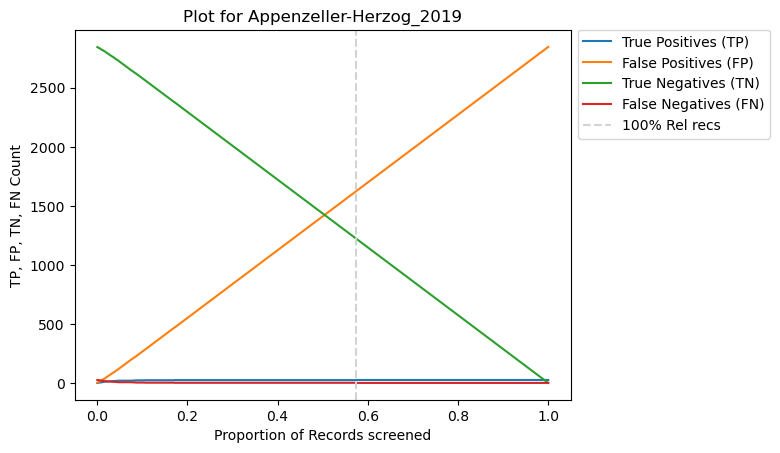

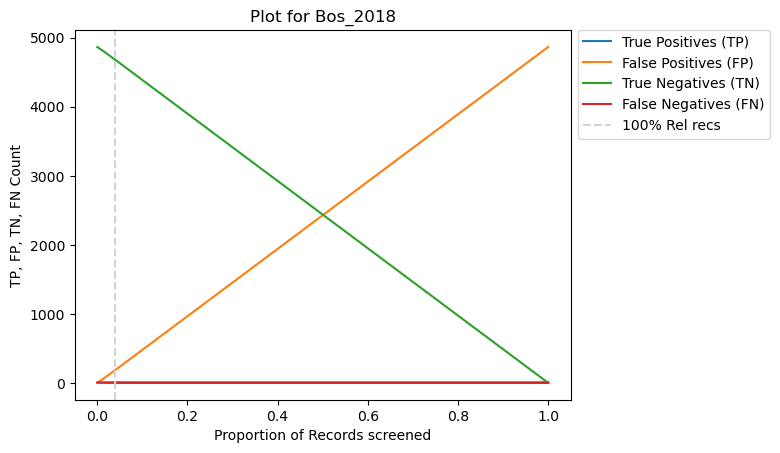

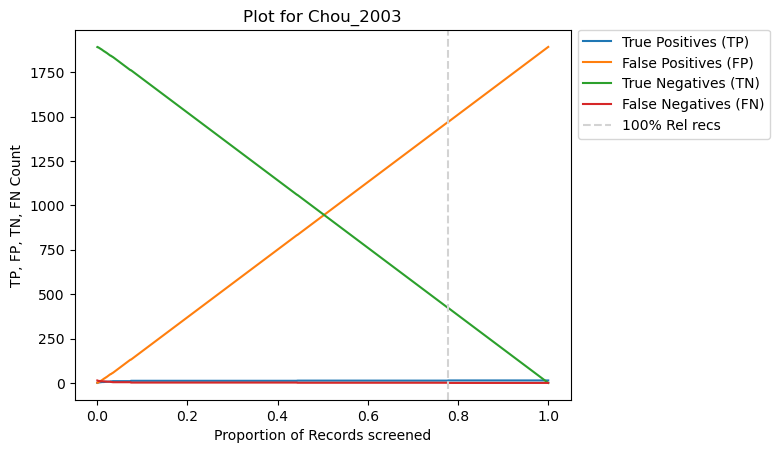

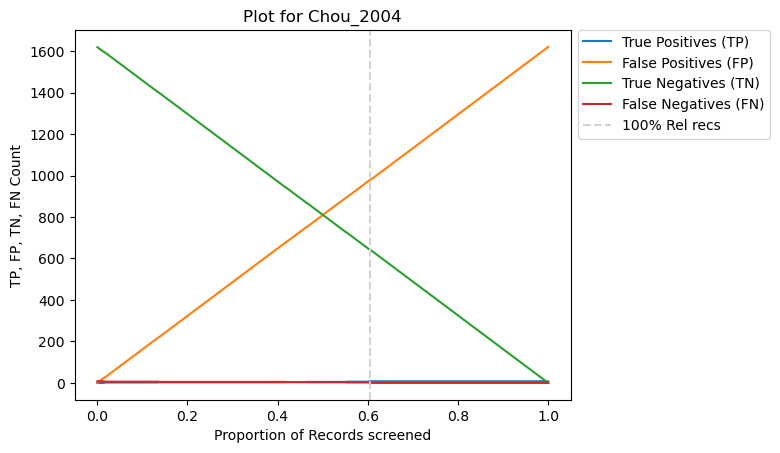

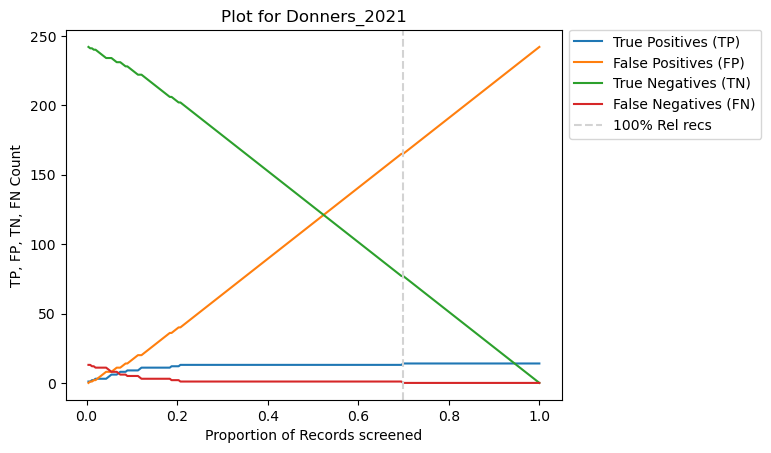

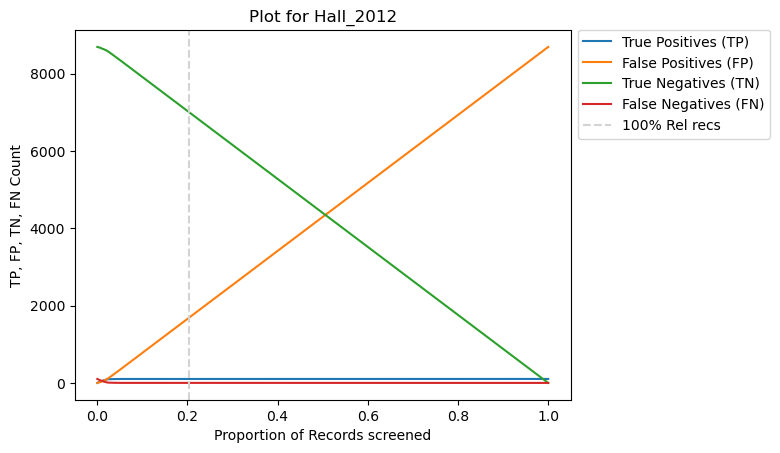

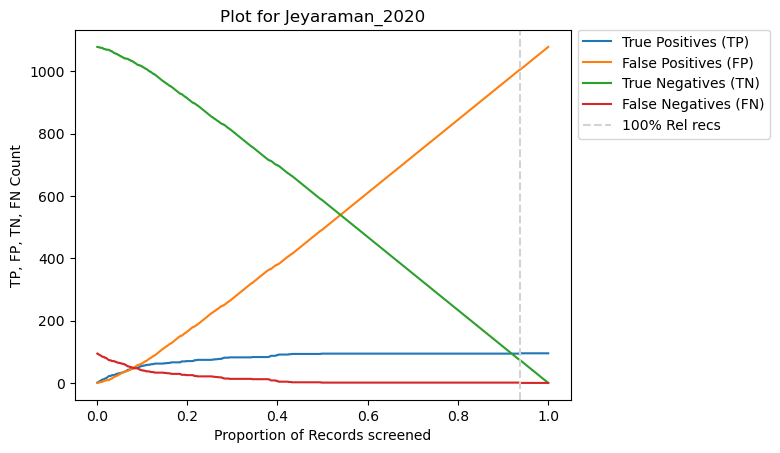

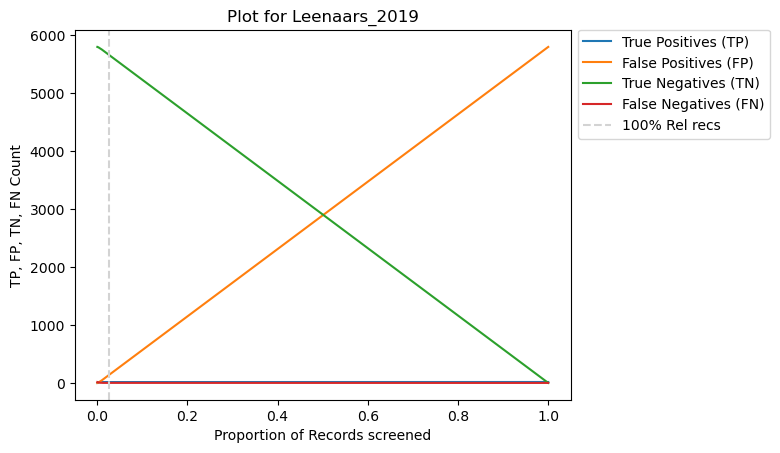

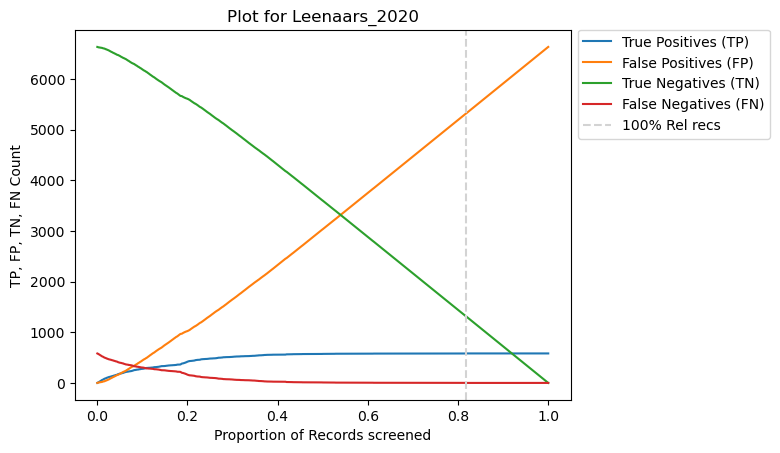

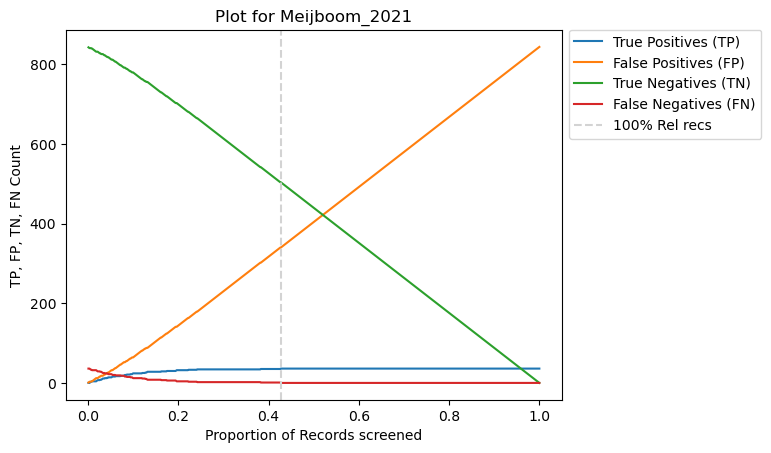

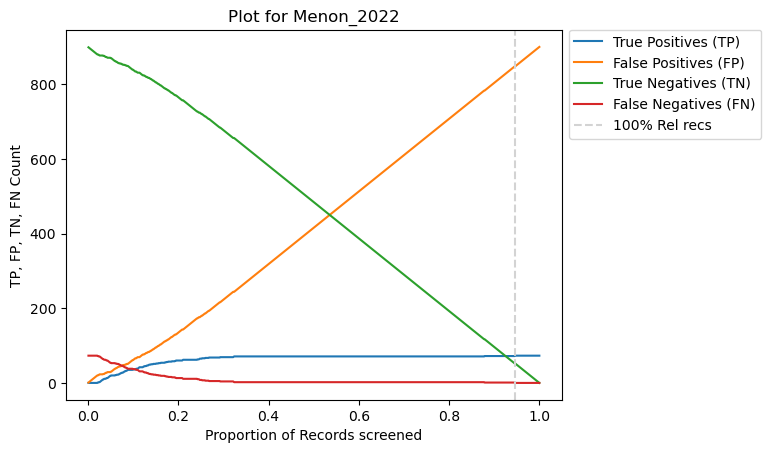

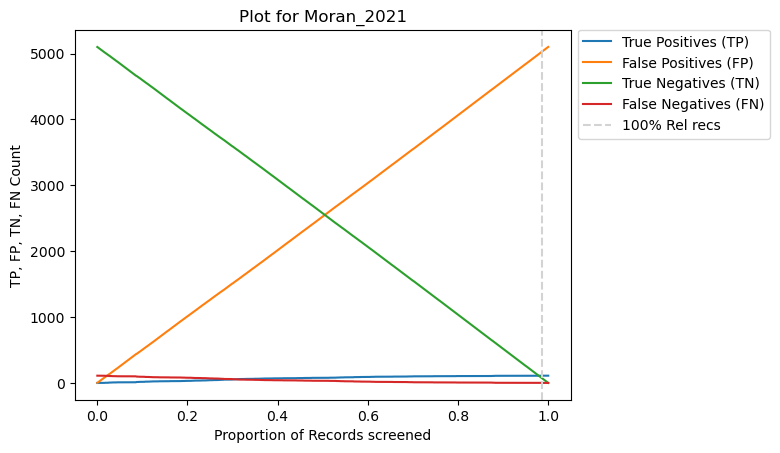

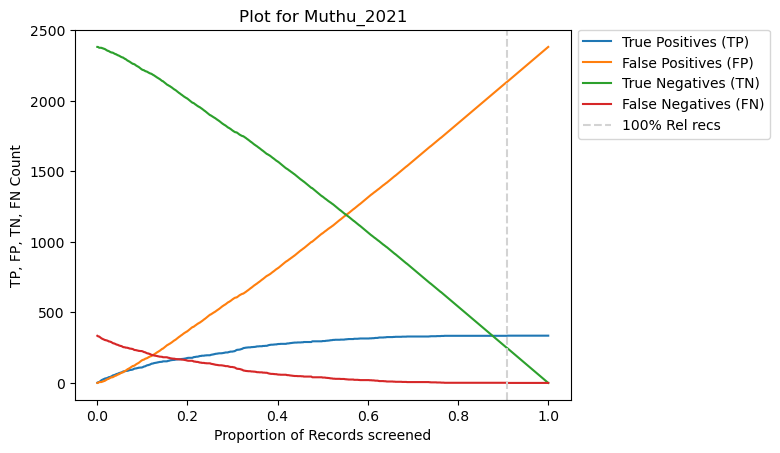

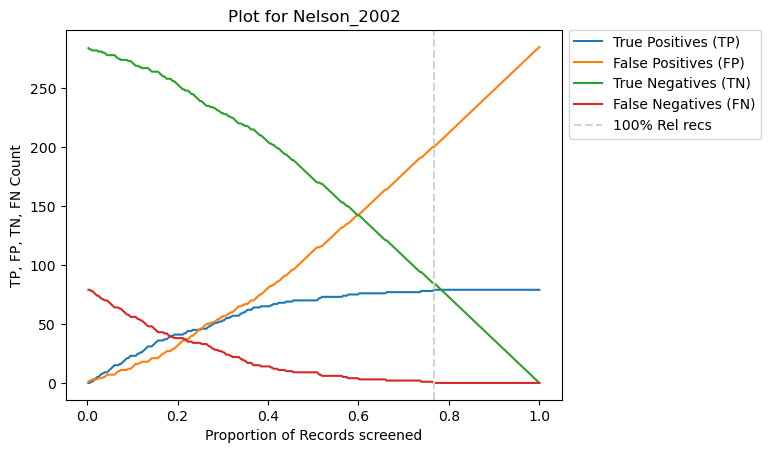

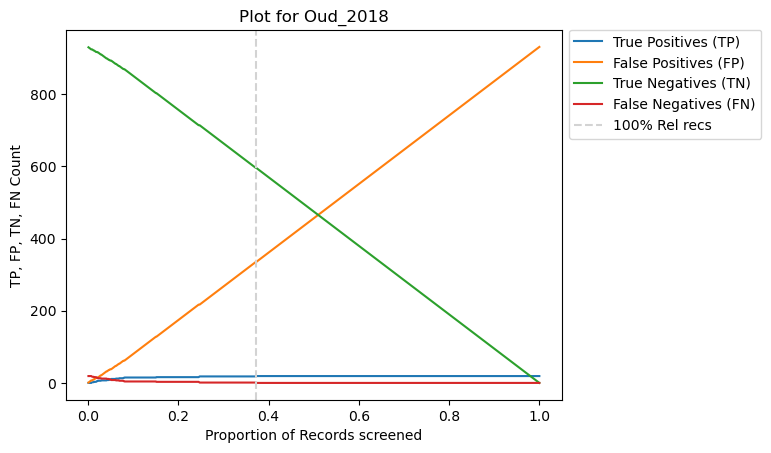

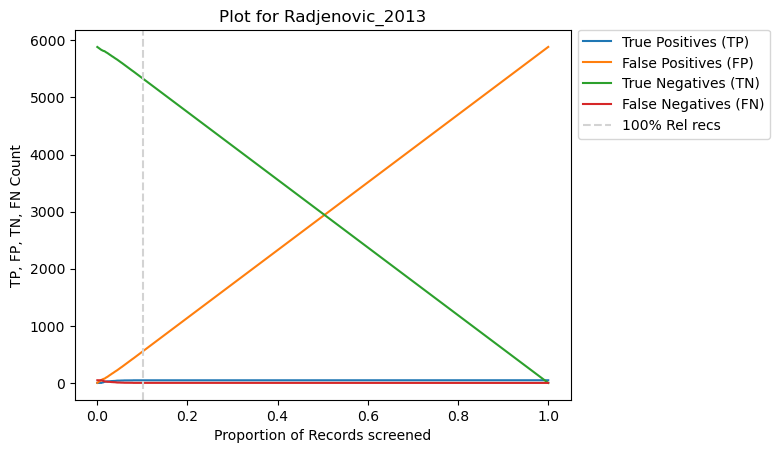

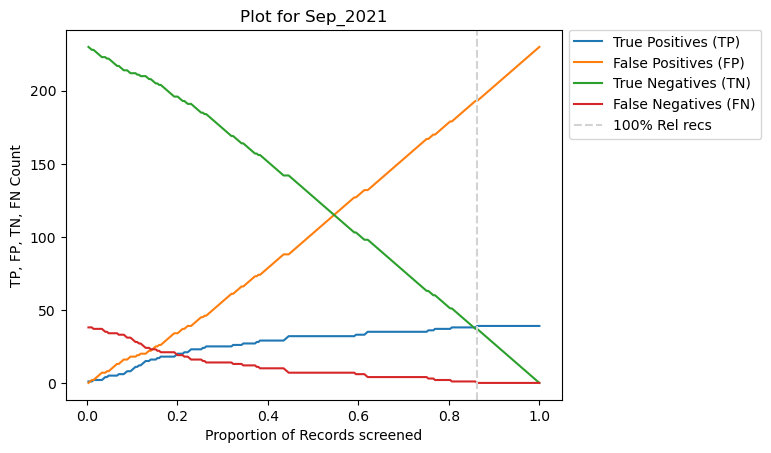

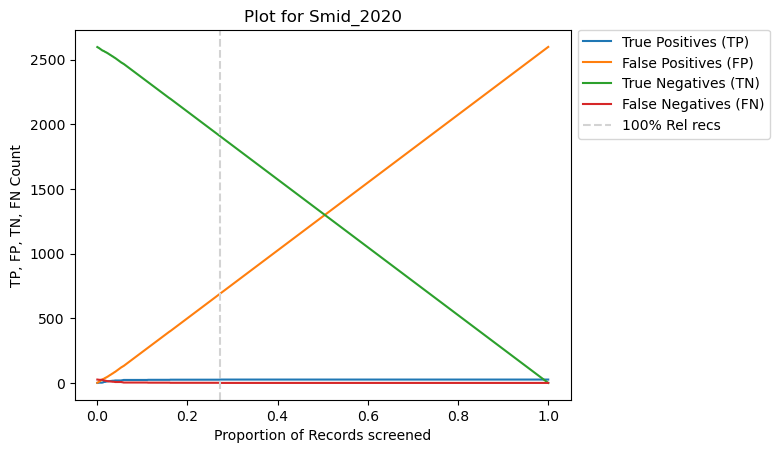

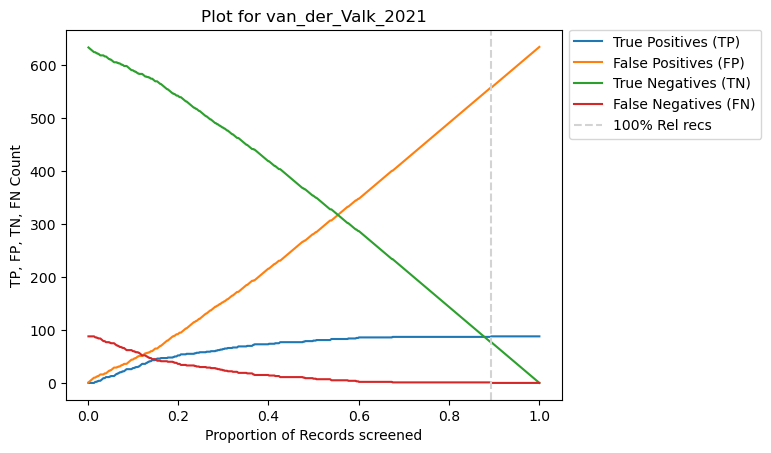

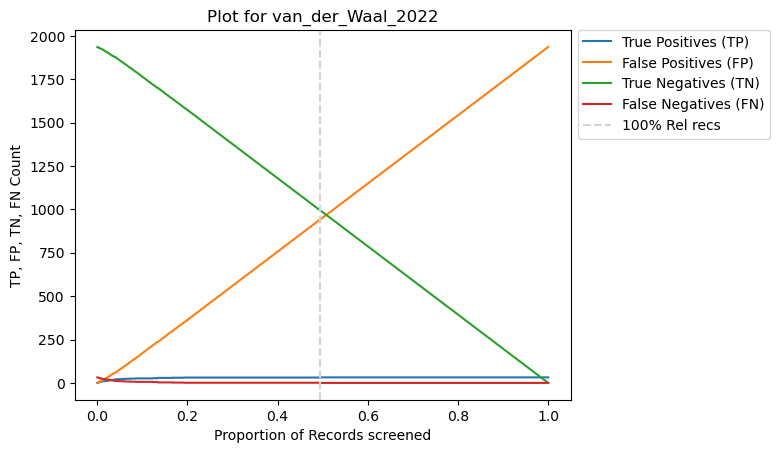

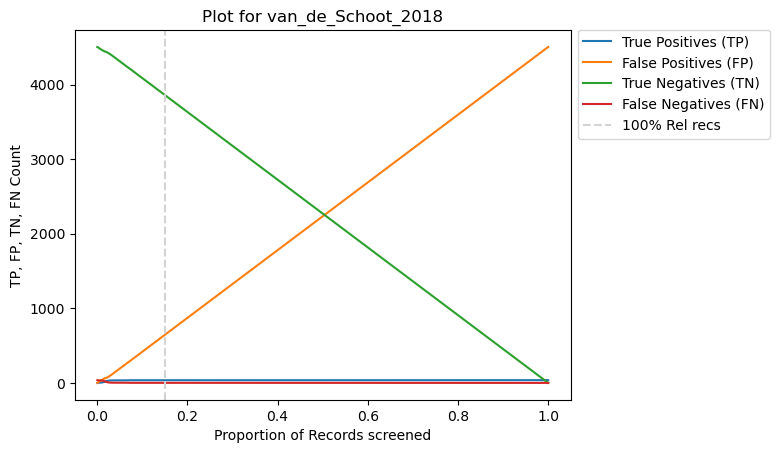

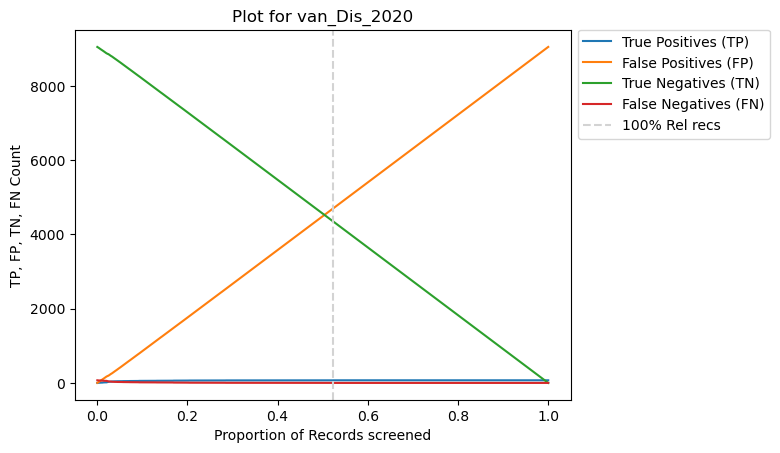

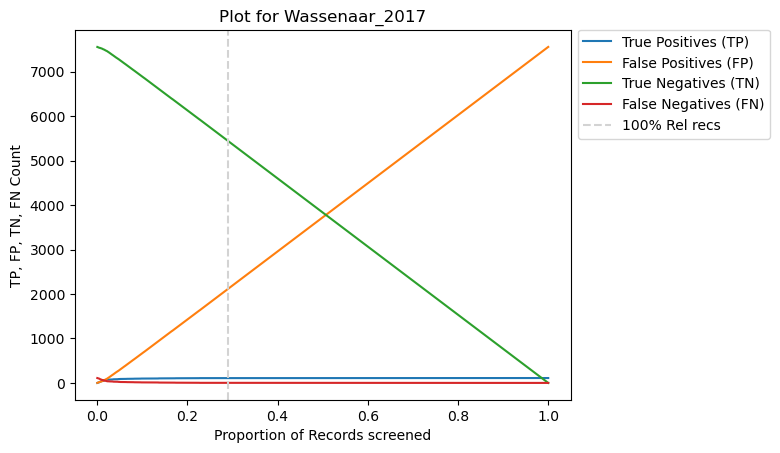

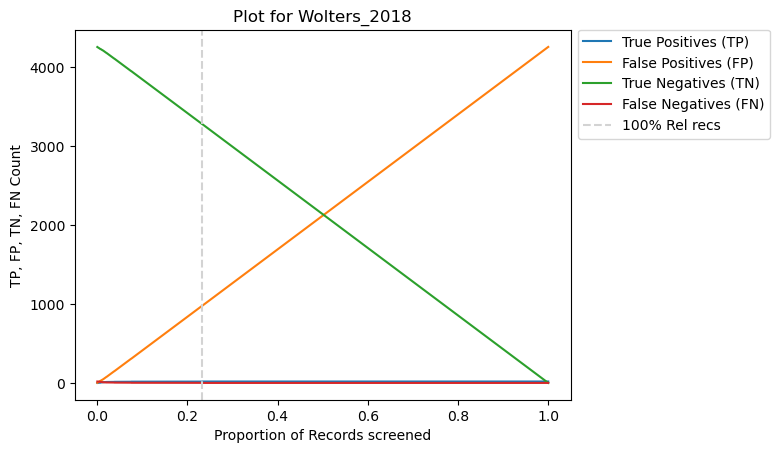

In [30]:
cm_plots(labels_dict_i) #click to expand window